# 🧠 DQN Stock Trading Agent on INFY.NS (Optimized)

## 📌 Overview
This notebook implements a Deep Q-Learning (DQN) trading agent on INFY.NS (Infosys Ltd). It includes real-time Buy/Sell annotations, technical indicator-based features, and step-by-step explanations for better learning.

---

## 📥 1. Data Collection & Feature Engineering
We use Yahoo Finance to fetch historical stock prices, and `ta` (technical analysis library) to engineer indicators like SMA, EMA, and RSI.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


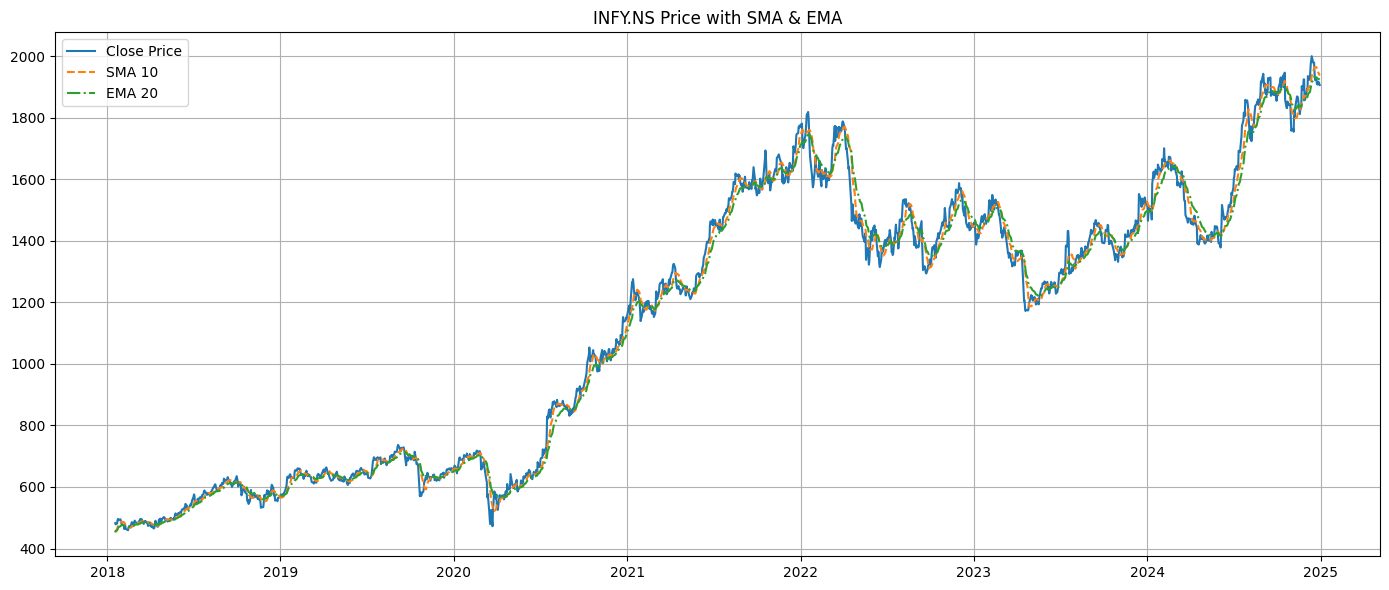

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler

symbol = 'INFY.NS'
start_date = '2018-01-01'
end_date = '2024-12-31'

# Download historical close prices
df_raw = yf.download(symbol, start=start_date, end=end_date)[['Close']].copy()

# Add indicators
df_raw['SMA_10'] = df_raw['Close'].rolling(window=10).mean()
df_raw['EMA_20'] = df_raw['Close'].ewm(span=20).mean()
df_raw['RSI'] = ta.momentum.RSIIndicator(close=df_raw['Close'].squeeze()).rsi()
df_raw.dropna(inplace=True)

# Plot actual prices with indicators
plt.figure(figsize=(14, 6))
plt.plot(df_raw['Close'], label='Close Price')
plt.plot(df_raw['SMA_10'], label='SMA 10', linestyle='--')
plt.plot(df_raw['EMA_20'], label='EMA 20', linestyle='-.')
plt.title(f"{symbol} Price with SMA & EMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analyse Big Changes in the Price 


📈 Top 5 Daily Gains:
2020-03-24 - 12.03% - ₹529.25
2020-07-16 - 9.63% - ₹828.60
2020-04-07 - 9.10% - ₹573.40
2024-01-12 - 7.93% - ₹1585.66
2020-03-20 - 7.27% - ₹525.12

📉 Top 5 Daily Drops:
2019-10-22 - -15.31% - ₹570.30
2020-03-23 - -10.04% - ₹472.40
2023-04-17 - -9.42% - ₹1205.15
2020-03-16 - -9.22% - ₹523.28
2023-07-21 - -8.13% - ₹1292.50

🔼 Highest Close:
2024-12-13 - ₹1999.70

🔽 Lowest Close:
2018-02-14 - ₹459.44


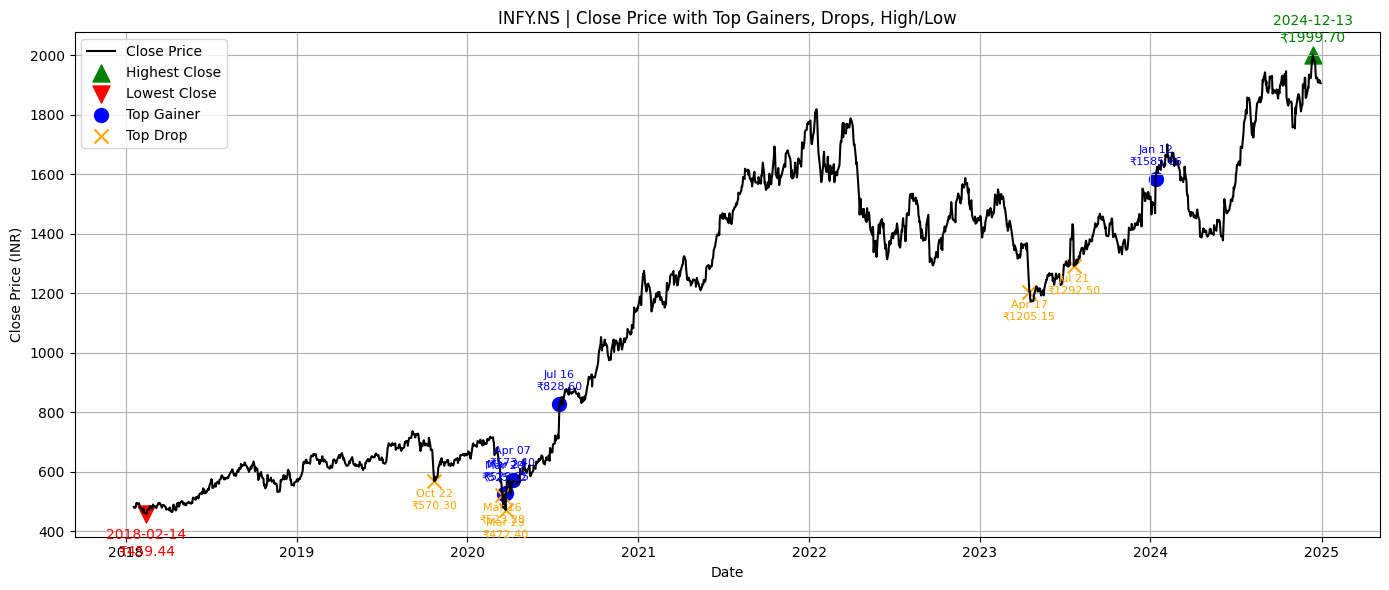

In [2]:
# --- Key Statistics and Trend Analysis ---

# Ensure 'Close' is a proper Series (1D)
close_series = df_raw['Close'].squeeze()

# Get max and min close details
max_close_date = close_series.idxmax()
min_close_date = close_series.idxmin()
max_close = close_series.loc[max_close_date]
min_close = close_series.loc[min_close_date]

# Compute daily percentage change
daily_pct_change = close_series.pct_change().dropna()

# Top 5 gain and drop days
biggest_gains = daily_pct_change.sort_values(ascending=False).head(5)
biggest_drops = daily_pct_change.sort_values().head(5)

# Display gainers
print("\n📈 Top 5 Daily Gains:")
for date, pct in biggest_gains.items():
    price = close_series.loc[date]
    print(f"{date.strftime('%Y-%m-%d')} - {pct * 100:.2f}% - ₹{price:.2f}")

# Display losers
print("\n📉 Top 5 Daily Drops:")
for date, pct in biggest_drops.items():
    price = close_series.loc[date]
    print(f"{date.strftime('%Y-%m-%d')} - {pct * 100:.2f}% - ₹{price:.2f}")

# Also print high/low info
print("\n🔼 Highest Close:")
print(f"{max_close_date.strftime('%Y-%m-%d')} - ₹{max_close:.2f}")

print("\n🔽 Lowest Close:")
print(f"{min_close_date.strftime('%Y-%m-%d')} - ₹{min_close:.2f}")

# --- Plot with Annotations ---

plt.figure(figsize=(14, 6))
plt.plot(close_series.index, close_series.values, label='Close Price', color='black')

# High and low markers
plt.scatter([max_close_date], [max_close], color='green', marker='^', s=150, label='Highest Close')
plt.scatter([min_close_date], [min_close], color='red', marker='v', s=150, label='Lowest Close')
plt.annotate(f"{max_close_date.strftime('%Y-%m-%d')}\n₹{max_close:.2f}",
             (max_close_date, max_close), textcoords="offset points", xytext=(0,10), ha='center', color='green')

plt.annotate(f"{min_close_date.strftime('%Y-%m-%d')}\n₹{min_close:.2f}",
             (min_close_date, min_close), textcoords="offset points", xytext=(0,-30), ha='center', color='red')

# Annotate gainers
for date, pct in biggest_gains.items():
    price = close_series.loc[date]
    plt.scatter(date, price, color='blue', marker='o', s=100, label='Top Gainer' if date == biggest_gains.index[0] else "")
    plt.annotate(f"{date.strftime('%b %d')}\n₹{price:.2f}",
                 (date, price), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Annotate losers
for date, pct in biggest_drops.items():
    price = close_series.loc[date]
    plt.scatter(date, price, color='orange', marker='x', s=100, label='Top Drop' if date == biggest_drops.index[0] else "")
    plt.annotate(f"{date.strftime('%b %d')}\n₹{price:.2f}",
                 (date, price), textcoords="offset points", xytext=(0, -20), ha='center', fontsize=8, color='orange')

plt.title(f"{symbol} | Close Price with Top Gainers, Drops, High/Low")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Experimenting with interactive dashboard using Plotly

In [3]:
!pip install nbformat ipywidgets notebook


In [4]:
import nbformat
import ipywidgets
import plotly
print("nbformat:", nbformat.__version__)
print("ipywidgets:", ipywidgets.__version__)
print("plotly:", plotly.__version__)


nbformat: 5.10.4
ipywidgets: 8.1.5
plotly: 6.0.1


In [5]:
import plotly.io as pio
pio.renderers.default = "vscode"

In [6]:
import plotly.graph_objects as go

# Create base trace for close prices
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=close_series.index,
    y=close_series.values,
    mode='lines',
    name='Close Price',
    line=dict(color='black')
))

# Highest close
fig.add_trace(go.Scatter(
    x=[max_close_date],
    y=[max_close],
    mode='markers+text',
    name='Highest Close',
    marker=dict(color='green', size=12, symbol='triangle-up'),
    text=[f"{max_close_date.strftime('%Y-%m-%d')}<br>₹{max_close:.2f}"],
    textposition='top center'
))

# Lowest close
fig.add_trace(go.Scatter(
    x=[min_close_date],
    y=[min_close],
    mode='markers+text',
    name='Lowest Close',
    marker=dict(color='red', size=12, symbol='triangle-down'),
    text=[f"{min_close_date.strftime('%Y-%m-%d')}<br>₹{min_close:.2f}"],
    textposition='bottom center'
))

# Top gainers
for date, pct in biggest_gains.items():
    price = close_series.loc[date]
    fig.add_trace(go.Scatter(
        x=[date],
        y=[price],
        mode='markers+text',
        name='Top Gainer',
        marker=dict(color='blue', size=10, symbol='circle'),
        text=[f"{date.strftime('%b %d')}<br>₹{price:.2f}"],
        textposition='top center',
        showlegend=(date == biggest_gains.index[0])
    ))

# Top drops
for date, pct in biggest_drops.items():
    price = close_series.loc[date]
    fig.add_trace(go.Scatter(
        x=[date],
        y=[price],
        mode='markers+text',
        name='Top Drop',
        marker=dict(color='orange', size=10, symbol='x'),
        text=[f"{date.strftime('%b %d')}<br>₹{price:.2f}"],
        textposition='bottom center',
        showlegend=(date == biggest_drops.index[0])
    ))

# Layout and interactivity settings
fig.update_layout(
    title=f"{symbol} | Interactive Close Price Chart with Events",
    xaxis_title="Date",
    yaxis_title="Close Price (INR)",
    hovermode="x unified",
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    template='plotly_white',
    height=600
)

fig.show()


In [7]:
# Normalize for DQN model
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_raw), columns=df_raw.columns, index=df_raw.index)

### XgBoost

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install xgboost


[*********************100%***********************]  1 of 1 completed


📉 RMSE: 79.49
📉 MAE:  51.16


C:\Users\piyush\AppData\Local\Temp\ipykernel_23880\2508290532.py:73: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\piyush\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



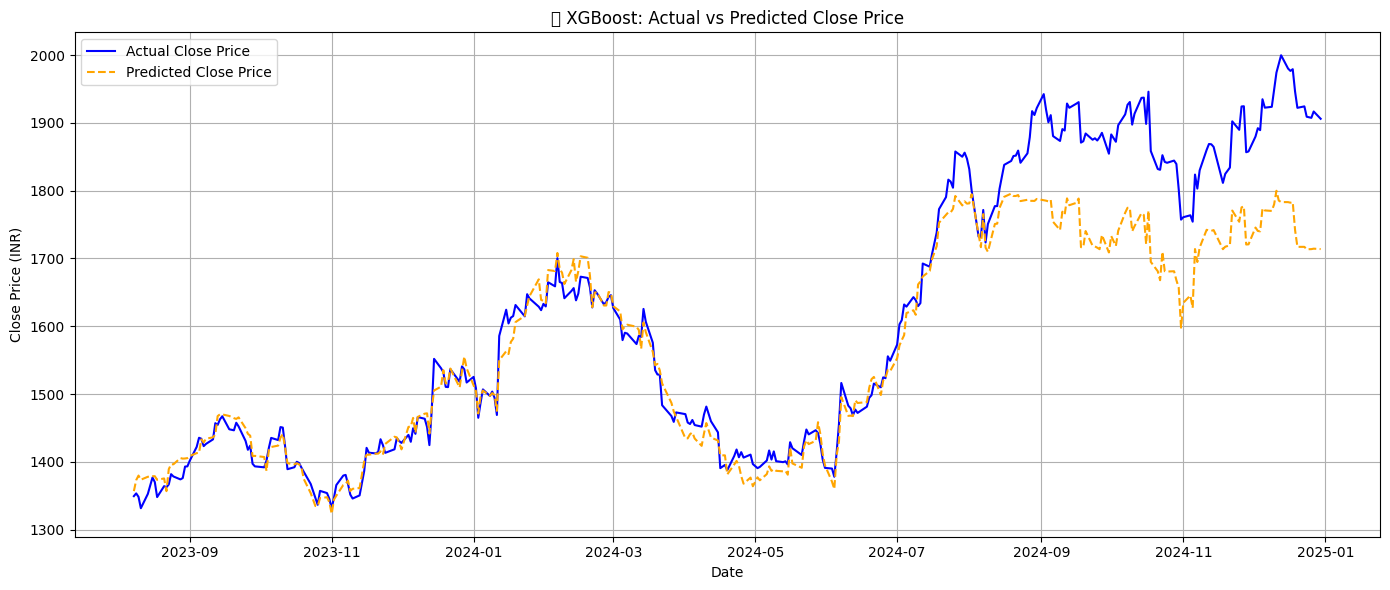

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import ta

# ---- Step 1: Flatten MultiIndex Columns ----
symbol = 'INFY.NS'
df_raw = yf.download(symbol, start='2018-01-01', end='2024-12-31')[['Close']].copy()
df_raw.columns = ['Close']  # ✅ flatten column name to be just 'Close'

# ---- Step 2: Feature Engineering ----
df_features = df_raw.copy()

df_features['Return'] = df_features['Close'].pct_change()
df_features['SMA_10'] = df_features['Close'].rolling(10).mean()
df_features['SMA_20'] = df_features['Close'].rolling(20).mean()
df_features['Momentum'] = df_features['Close'] - df_features['Close'].shift(10)
df_features['Volatility'] = df_features['Return'].rolling(10).std()
df_features['RSI'] = ta.momentum.RSIIndicator(close=df_features['Close'].squeeze()).rsi()

# ---- Step 3: Drop NaNs from Features and Target ----
features = ['SMA_10', 'SMA_20', 'Momentum', 'Volatility', 'RSI']
target = 'Close'

df_features.dropna(subset=features + [target], inplace=True)

# ---- Step 4: Train-Test Split ----
split_index = int(len(df_features) * 0.8)

X = df_features[features]
y = df_features[target]

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# ---- Step 5: Scale Features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Step 6: Train XGBoost Regressor ----
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# ---- Step 7: Predict & Evaluate ----
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE:  {mae:.2f}")

# ---- Step 8: Plot Predictions vs Actual ----
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("📈 XGBoost: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Enhancements in XgBoost

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


R² Score: 0.8614
RMSE: 75.38
MAE:  47.80


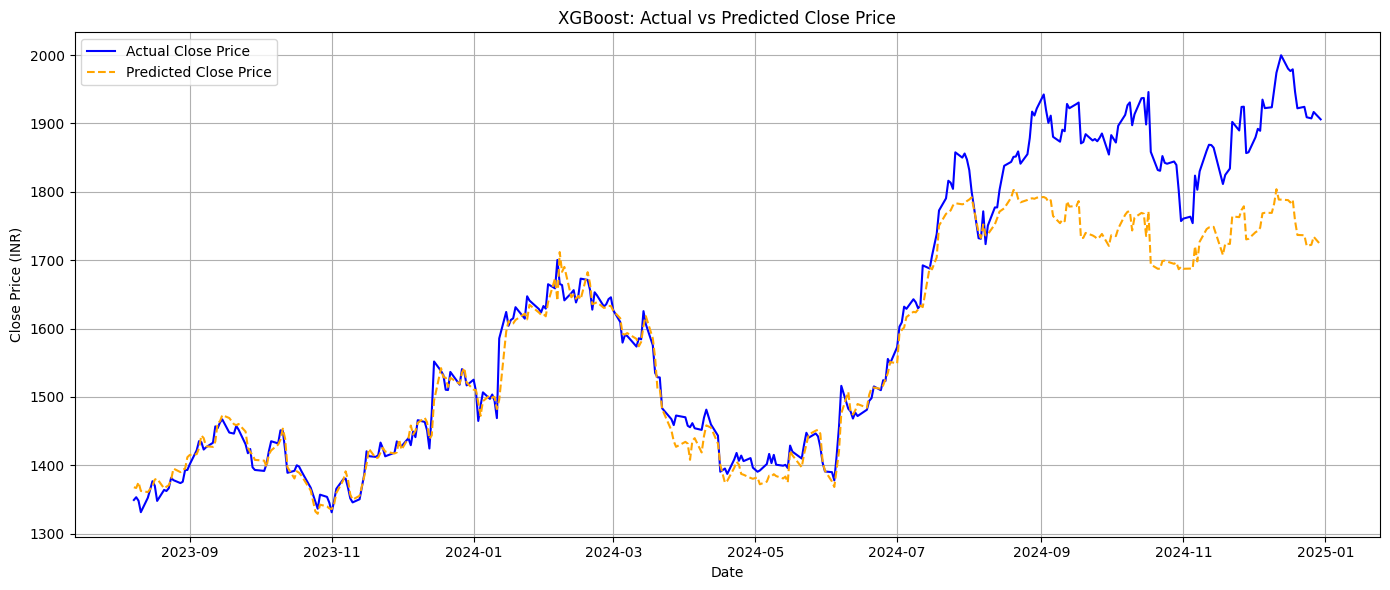

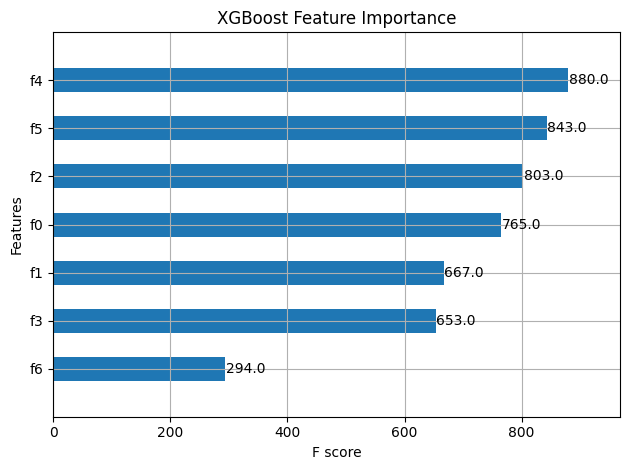

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import ta

# 🧹 Step 1: Ensure 'Close' column is named correctly
df_raw.columns = ['Close']  # Flatten from ('Close', 'INFY.NS') → 'Close'

# 🛠 Step 2: Feature Engineering
df_features = df_raw.copy()
df_features['Return'] = df_features['Close'].pct_change()
df_features['SMA_10'] = df_features['Close'].rolling(10).mean()
df_features['SMA_20'] = df_features['Close'].rolling(20).mean()
df_features['Momentum'] = df_features['Close'] - df_features['Close'].shift(10)
df_features['Volatility'] = df_features['Return'].rolling(10).std()
df_features['RSI'] = ta.momentum.RSIIndicator(close=df_features['Close'].squeeze()).rsi()

# ➕ New lag features
df_features['Lag_1'] = df_features['Close'].shift(1)
df_features['Lag_3'] = df_features['Close'].shift(3)

# 🎯 Define Features & Target
features = ['SMA_10', 'SMA_20', 'Momentum', 'Volatility', 'RSI', 'Lag_1', 'Lag_3']
target = 'Close'

df_features.dropna(subset=features + [target], inplace=True)

# 🔀 Train-test split
split_index = int(len(df_features) * 0.8)
X = df_features[features]
y = df_features[target]

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# 🔧 Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Train model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 📈 Predict & Evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")

# 📊 Plot Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("XGBoost: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Feature Importance
xgb.plot_importance(model, height=0.5, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


### Regression ###

✅ Simple Linear Regression
RMSE: 22.38
MAE:  16.12
R² Score: 0.988


C:\Users\piyush\AppData\Local\Temp\ipykernel_23880\2361311741.py:51: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\piyush\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



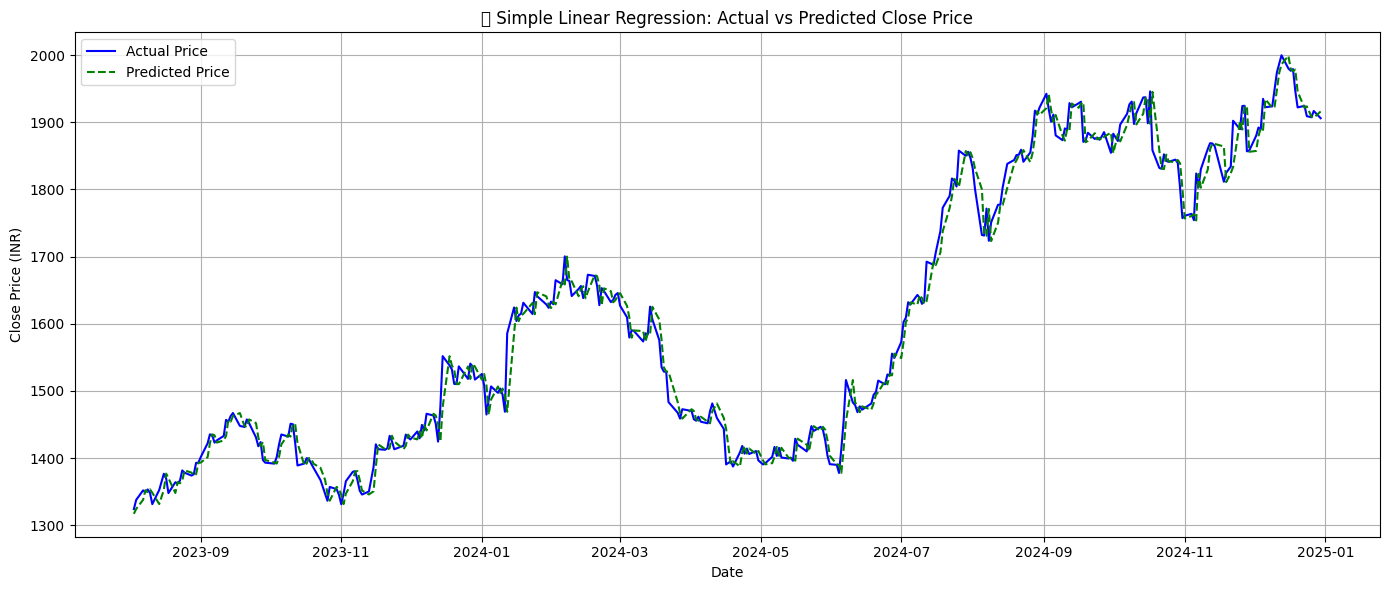

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# 🧹 Step 1: Prepare your Data
df = df_raw.copy()  # Assuming df_raw is your cleaned INFY.NS 'Close' price DataFrame
df.columns = ['Close']  # Flatten multi-index columns if needed

# ➕ Step 2: Add Lag Feature (Yesterday's Price)
df['Lag_1'] = df['Close'].shift(1)

# 🧹 Drop the first row with NaN due to shift
df.dropna(inplace=True)

# 🎯 Define feature and target
X = df[['Lag_1']]  # independent variable: yesterday's price
y = df['Close']    # dependent variable: today's price

# 🔀 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2  # Time series → no shuffling!
)

# 🔧 Step 4: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Step 5: Predictions
y_pred = model.predict(X_test)

# 📊 Step 6: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ Simple Linear Regression")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R² Score: {model.score(X_test, y_test):.3f}")

# 📉 Step 7: Plot Predictions vs Actual
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='green', linestyle='--')
plt.title("📈 Simple Linear Regression: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM ###

[*********************100%***********************]  1 of 1 completed


Epoch 0: Loss = 0.001137
Epoch 5: Loss = 0.002162
Epoch 10: Loss = 0.002587
Epoch 15: Loss = 0.003497
Epoch 20: Loss = 0.003567
Epoch 25: Loss = 0.003446


C:\Users\piyush\AppData\Local\Temp\ipykernel_23880\1068244171.py:102: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\piyush\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



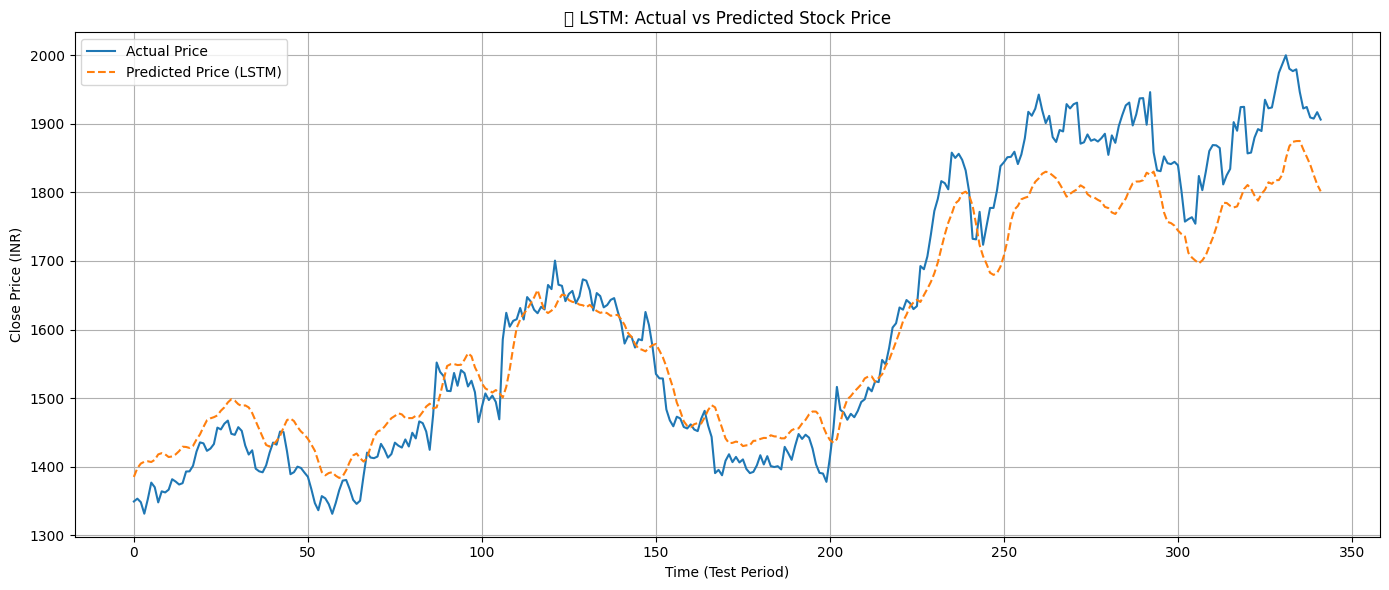

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Step 1: Load data
symbol = 'INFY.NS'
df_raw = yf.download(symbol, start='2018-01-01', end='2024-12-31')[['Close']].copy()
df_raw.columns = ['Close']

# Step 2: Feature Engineering
df_lstm = df_raw.copy()
df_lstm['Lag_1'] = df_lstm['Close'].shift(1)
df_lstm['Lag_2'] = df_lstm['Close'].shift(2)
df_lstm['SMA_10'] = df_lstm['Close'].rolling(10).mean()
df_lstm['Momentum'] = df_lstm['Close'] - df_lstm['Close'].shift(10)
df_lstm.dropna(inplace=True)

# Step 3: Normalize
features = ['Lag_1', 'Lag_2', 'SMA_10', 'Momentum']
target = 'Close'

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_lstm[features])
y_scaled = scaler_y.fit_transform(df_lstm[[target]])

# Step 4: Create sequences
def create_sequences(X, y, window_size=10):
    Xs, ys = [], []
    for i in range(window_size, len(X)):
        Xs.append(X[i - window_size:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

window_size = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled)

# Step 5: Train/Test Split
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# Step 6: Convert to Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=False)

# Step 7: Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel(input_size=len(features))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 8: Train the Model
for epoch in range(30):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Step 9: Predict and Inverse Scale
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.numpy()

    y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_true_inv = scaler_y.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Step 10: Plot Results
plt.figure(figsize=(14, 6))
plt.plot(y_true_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price (LSTM)', linestyle='--')
plt.title("📈 LSTM: Actual vs Predicted Stock Price")
plt.xlabel("Time (Test Period)")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute metrics on inverse-transformed predictions
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE:  {mae:.2f}")
print(f"🎯 R² Score: {r2:.4f}")


📉 RMSE: 63.73
📉 MAE:  51.70
🎯 R² Score: 0.9009


### Visualisation of Model Performance ###

C:\Users\piyush\AppData\Local\Temp\ipykernel_23880\3057896356.py:33: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\piyush\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



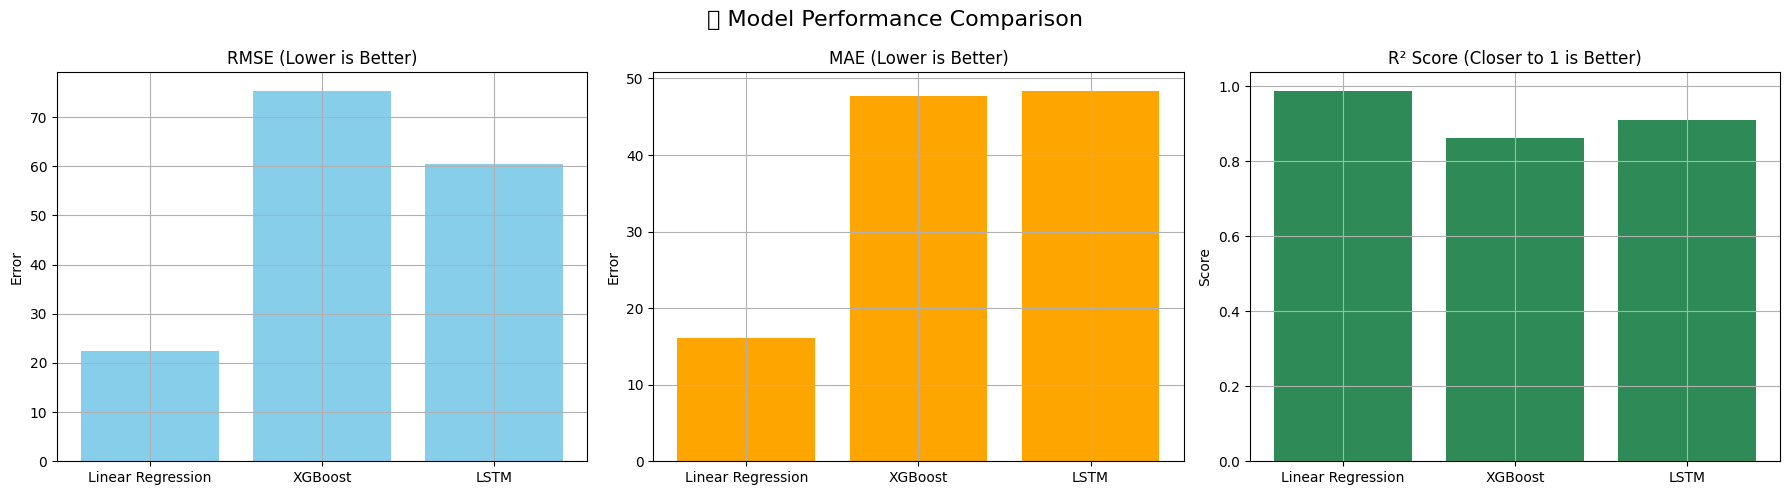

In [16]:
# 📊 Updated metrics from Linear Regression, XGBoost, and LSTM
metrics = {
    "Model": ["Linear Regression", "XGBoost", "LSTM"],
    "RMSE": [22.38, 75.33, 60.37],
    "MAE": [16.12, 47.72, 48.38],
    "R2 Score": [0.988, 0.8616, 0.9111]
}

df_metrics = pd.DataFrame(metrics)

# --- Plotting all three metrics ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axs[0].bar(df_metrics["Model"], df_metrics["RMSE"], color="skyblue")
axs[0].set_title("RMSE (Lower is Better)")
axs[0].set_ylabel("Error")
axs[0].grid(True)

# MAE
axs[1].bar(df_metrics["Model"], df_metrics["MAE"], color="orange")
axs[1].set_title("MAE (Lower is Better)")
axs[1].set_ylabel("Error")
axs[1].grid(True)

# R2 Score
axs[2].bar(df_metrics["Model"], df_metrics["R2 Score"], color="seagreen")
axs[2].set_title("R² Score (Closer to 1 is Better)")
axs[2].set_ylabel("Score")
axs[2].grid(True)

fig.suptitle("📊 Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()

---

## ⚙️ 2. Environment Setup
We define a custom Gym environment that simulates trading decisions (Buy/Sell/Hold) and tracks profit.

In [17]:
import gym
from gym import spaces

class StockTradingEnv(gym.Env):
    def __init__(self, data):
        super().__init__()
        self.data = data
        self.n_steps = len(data)
        self.current_step = 0
        self.action_space = spaces.Discrete(3)  # Hold, Buy, Sell
        self.observation_space = spaces.Box(low=0, high=1, shape=(data.shape[1],), dtype=np.float32)
        self.inventory = []
        self.total_profit = 0
        self.trade_log = []  # Stores ('Buy'/'Sell', date)

    def reset(self):
        self.current_step = 0
        self.inventory = []
        self.total_profit = 0
        self.trade_log = []
        return np.array(self.data.iloc[self.current_step], dtype=np.float32)

    def step(self, action):
        reward = 0
        done = False
        price = self.data.iloc[self.current_step, 0]
        date = self.data.index[self.current_step]

        if action == 1:  # Buy
            self.inventory.append(price)
            self.trade_log.append(('Buy', date))
        elif action == 2 and self.inventory:  # Sell
            bought_price = self.inventory.pop(0)
            profit = price - bought_price
            reward = profit
            self.total_profit += profit
            self.trade_log.append(('Sell', date))

        self.current_step += 1
        done = self.current_step >= self.n_steps - 1
        next_state = np.array(self.data.iloc[self.current_step], dtype=np.float32) if not done else np.zeros_like(self.data.iloc[0])
        return next_state, reward, done, {}

---

## 🤖 3. DQN Agent Definition
This section builds the DQN model and replay logic for training.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random

class DQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.memory = deque(maxlen=5000)
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = DQNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(3)
        with torch.no_grad():
            return torch.argmax(self.model(torch.FloatTensor(state).unsqueeze(0))[0]).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            reward = float(reward)
            next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
            target = reward if done else reward + self.gamma * torch.max(self.model(next_state_tensor)[0])
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            target_f = self.model(state_tensor)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = self.criterion(target_f[0], self.model(state_tensor)[0])
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

---

## 🎯 4. Training the Agent

In [19]:
env = StockTradingEnv(df_scaled)
agent = DQNAgent(df_scaled.shape[1], 3)

episode_rewards = []
profits = []

for e in range(20):
    state = env.reset()
    total_reward = 0
    step_count = 0
    while True:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if step_count % 5 == 0:
            agent.replay(64)
        step_count += 1
        if done:
            print(f"Episode {e+1}: Reward = {total_reward:.2f}, Profit = {env.total_profit:.2f}")
            episode_rewards.append(total_reward)
            profits.append(env.total_profit)
            break

Episode 1: Reward = 5.78, Profit = 5.78
Episode 2: Reward = 0.72, Profit = 0.72
Episode 3: Reward = 0.72, Profit = 0.72
Episode 4: Reward = 1.40, Profit = 1.40
Episode 5: Reward = 0.79, Profit = 0.79
Episode 6: Reward = -0.14, Profit = -0.14
Episode 7: Reward = 0.32, Profit = 0.32
Episode 8: Reward = 1.72, Profit = 1.72
Episode 9: Reward = 0.94, Profit = 0.94
Episode 10: Reward = 0.73, Profit = 0.73
Episode 11: Reward = 1.18, Profit = 1.18
Episode 12: Reward = 0.56, Profit = 0.56
Episode 13: Reward = -0.42, Profit = -0.42
Episode 14: Reward = -0.17, Profit = -0.17
Episode 15: Reward = 1.81, Profit = 1.81
Episode 16: Reward = 1.21, Profit = 1.21
Episode 17: Reward = 0.13, Profit = 0.13
Episode 18: Reward = 0.26, Profit = 0.26
Episode 19: Reward = 1.79, Profit = 1.79
Episode 20: Reward = 1.25, Profit = 1.25


---

## 📈 5. Performance Visualization

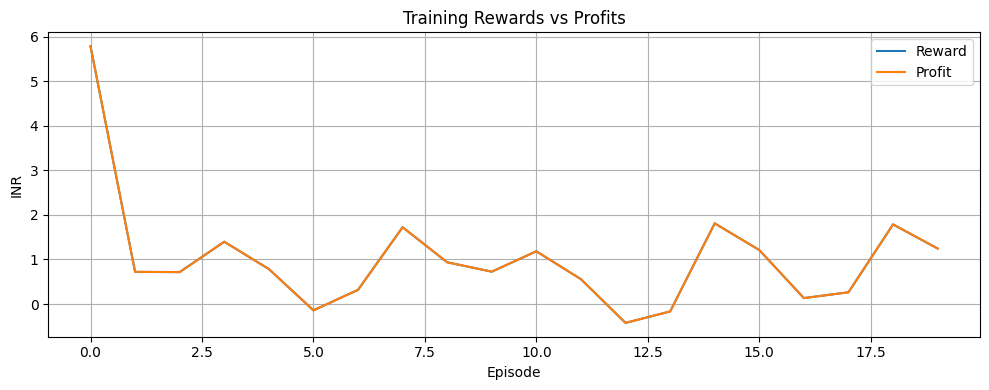

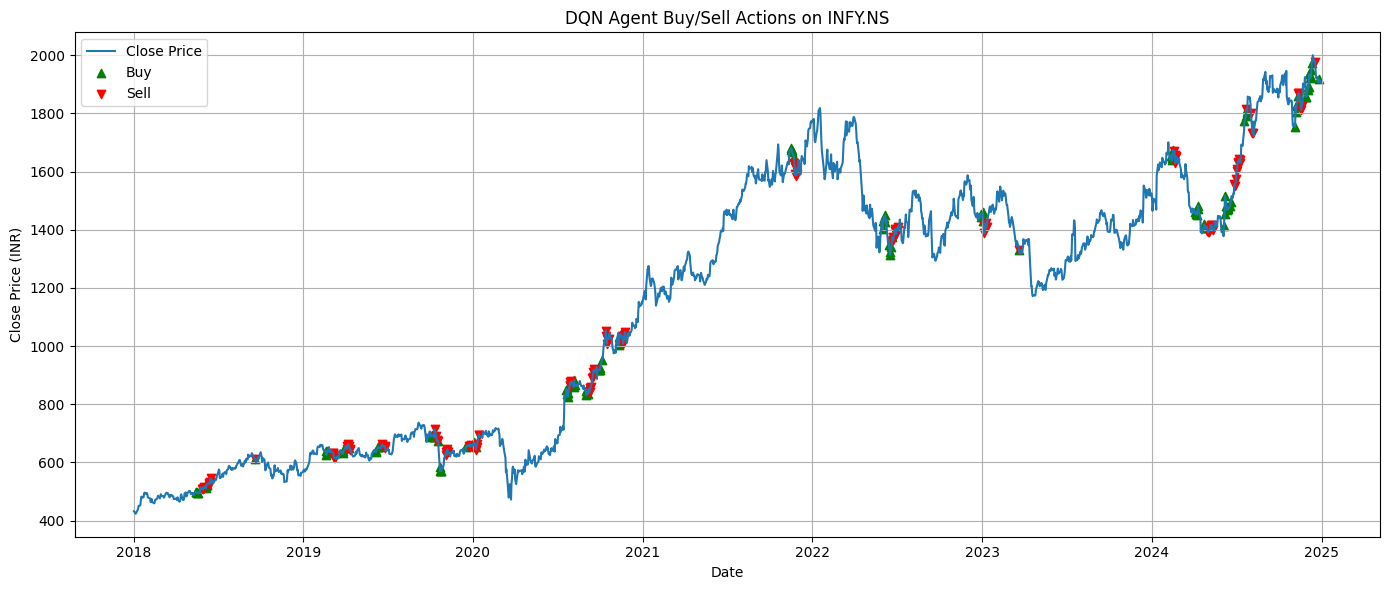

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(episode_rewards, label="Reward")
plt.plot(profits, label="Profit")
plt.title("Training Rewards vs Profits")
plt.xlabel("Episode")
plt.ylabel("INR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

buy_dates = [d for a, d in env.trade_log if a == 'Buy']
sell_dates = [d for a, d in env.trade_log if a == 'Sell']
buy_prices = df_raw.loc[buy_dates]['Close']
sell_prices = df_raw.loc[sell_dates]['Close']

plt.figure(figsize=(14, 6))
plt.plot(df_raw['Close'], label='Close Price')
plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy')
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell')
plt.title(f"DQN Agent Buy/Sell Actions on {symbol}")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()